In [5]:
library(tidyverse)
library(ggplot2)
library(stringr)
library(dplyr)
library(readxl)
library(ggpubr)


New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

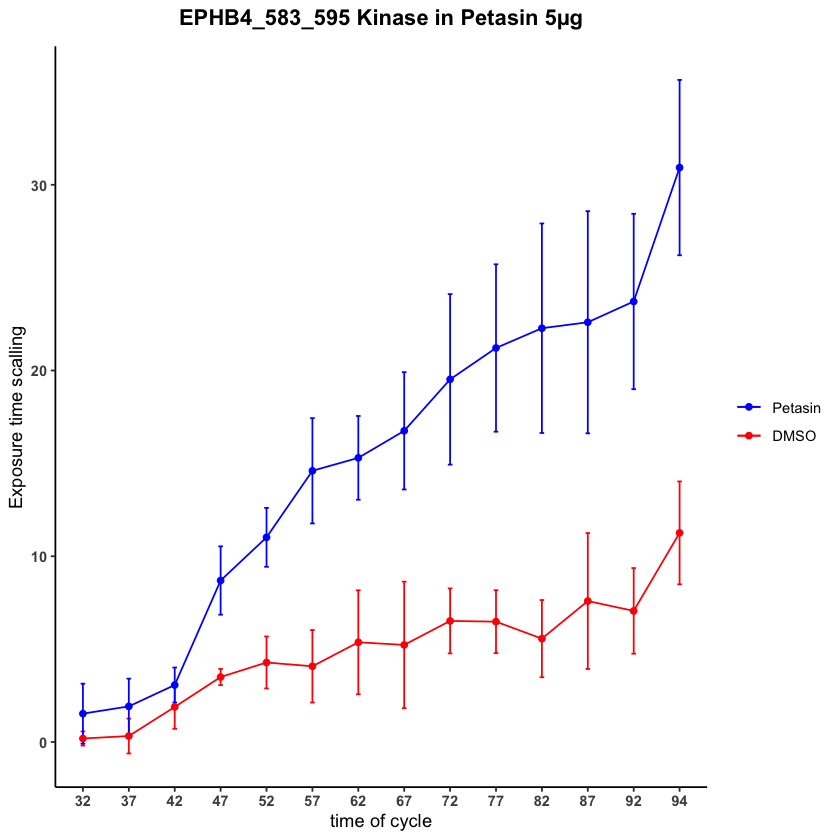

In [6]:

pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_EPHB4 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "EPHB4_583_595") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

dmso_p5_EPHB4$treatment <- str_extract(dmso_p5_EPHB4$samples, "\\w+")

dmso_p5_EPHB4$time <- substr(dmso_p5_EPHB4$samples, nchar(dmso_p5_EPHB4$samples) - 1, nchar(dmso_p5_EPHB4$samples))

##line plot

  ggplot(dmso_p5_EPHB4, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=.1) +
     geom_line(scale_linewidth = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "time of cycle",
    y = "Exposure time scalling",
    title = "EPHB4_583_595 Kinase in Petasin 5µg"
  )+
      theme_classic()+
  theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.text = element_text(face="bold")
  )

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

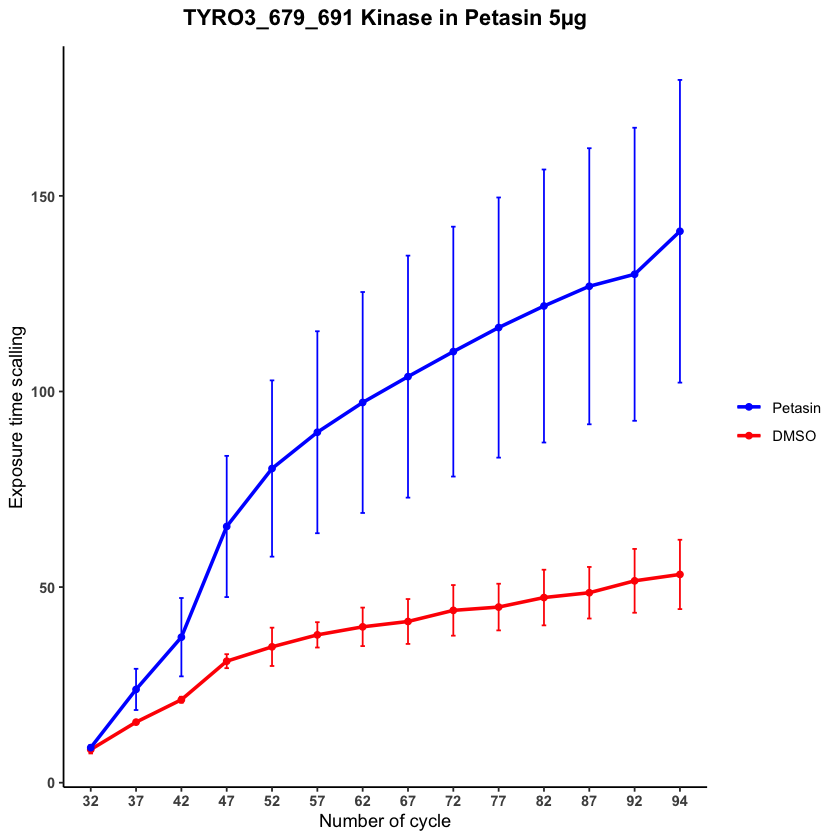

In [7]:

pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_TYRO3 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "TYRO3_679_691") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

dmso_p5_TYRO3 $treatment <- str_extract(dmso_p5_TYRO3 $samples, "\\w+")

dmso_p5_TYRO3 $time <- substr(dmso_p5_TYRO3 $samples, nchar(dmso_p5_TYRO3 $samples) - 1, nchar(dmso_p5_TYRO3 $samples))

##line plot

  ggplot(dmso_p5_TYRO3 , aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "TYRO3_679_691 Kinase in Petasin 5µg")+
      theme_classic()+
  theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.text = element_text(face="bold")
  )

In [8]:
dmso_p5_TYRO3 

samples,avg_ets,sd_ets,number,sem,treatment,time
<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
DMSO Huh7_ 32,8.474178,1.7369305,3,1.0028173,DMSO,32
DMSO Huh7_ 37,15.477309,0.3654242,3,0.2109778,DMSO,37
DMSO Huh7_ 42,21.205008,1.3217302,3,0.7631013,DMSO,42
DMSO Huh7_ 47,31.056338,3.0992150,3,1.7893326,DMSO,47
DMSO Huh7_ 52,34.726134,8.4833190,3,4.8978465,DMSO,52
DMSO Huh7_ 57,37.785602,5.6107365,3,3.2393602,DMSO,57
DMSO Huh7_ 62,39.835680,8.5230016,3,4.9207573,DMSO,62
DMSO Huh7_ 67,41.205008,9.9364649,3,5.7368207,DMSO,67
DMSO Huh7_ 72,44.045383,11.2075455,3,6.4706794,DMSO,72


New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

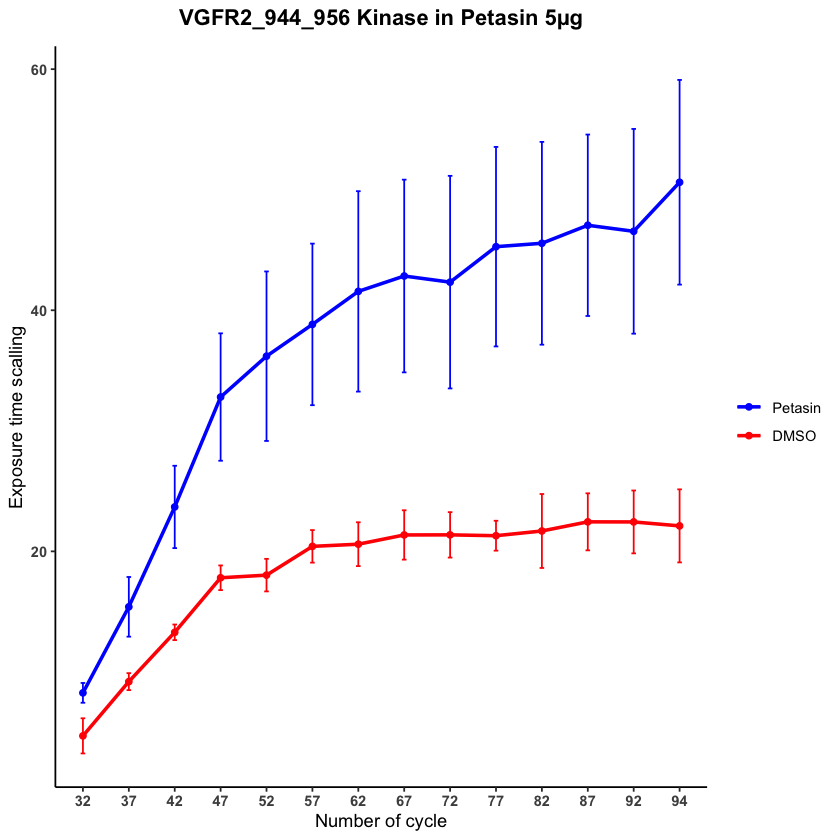

In [9]:

pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_VGFR2 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "VGFR2_944_956") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

dmso_p5_VGFR2 $treatment <- str_extract(dmso_p5_VGFR2$samples, "\\w+")

dmso_p5_VGFR2 $time <- substr(dmso_p5_VGFR2 $samples, nchar(dmso_p5_VGFR2 $samples) - 1, nchar(dmso_p5_VGFR2$samples))

##line plot

  ggplot(dmso_p5_VGFR2 , aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "VGFR2_944_956 Kinase in Petasin 5µg")+
      theme_classic()+
  theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.text = element_text(face="bold")
  )

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

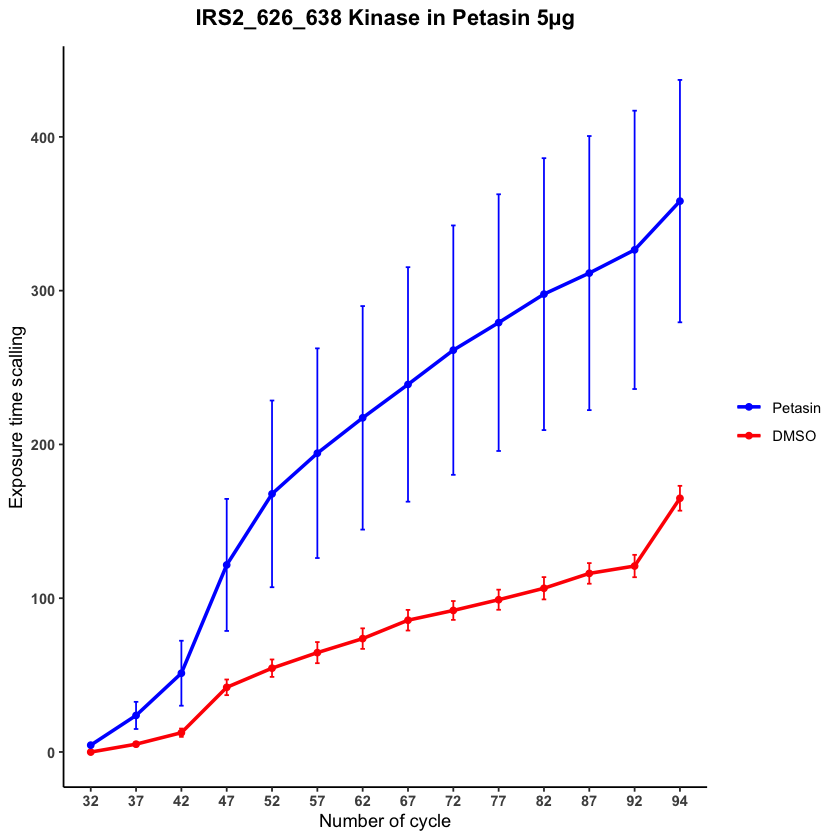

In [10]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_IRS2 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "IRS2_626_638") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

dmso_p5_IRS2 $treatment <- str_extract(dmso_p5_IRS2$samples, "\\w+")

dmso_p5_IRS2$time <- substr(dmso_p5_IRS2$samples, nchar(dmso_p5_IRS2$samples) - 1, nchar(dmso_p5_IRS2$samples))

##line plot

  ggplot(dmso_p5_IRS2, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "IRS2_626_638 Kinase in Petasin 5µg")+
      theme_classic()+
  theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.text = element_text(face="bold")
  )

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

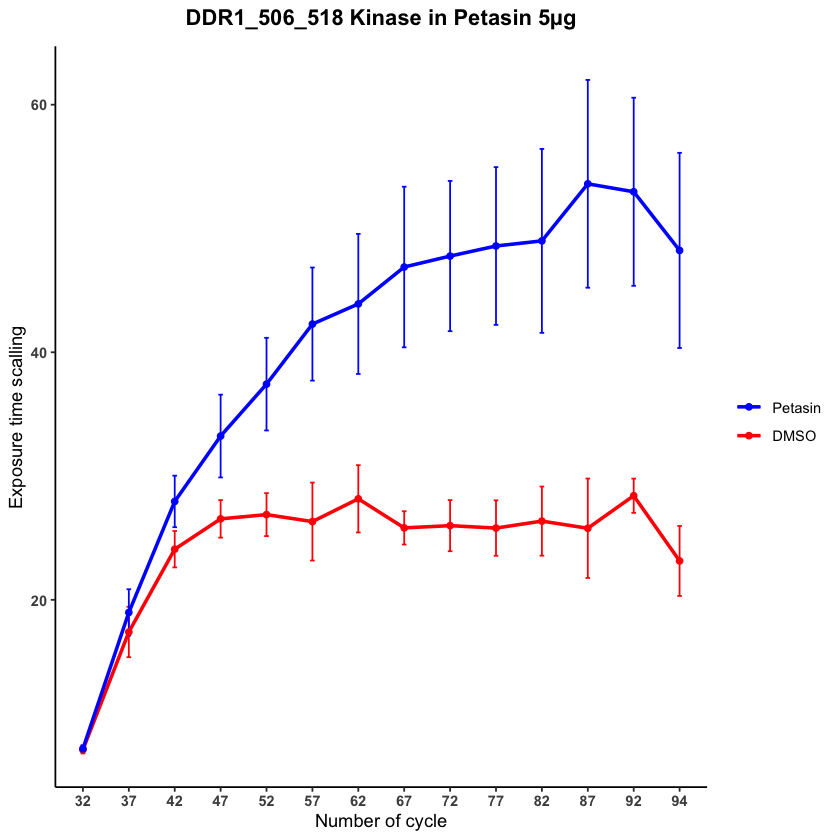

In [11]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_DDR1 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "DDR1_506_518") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_DDR1$treatment <- str_extract(dmso_p5_DDR1$samples, "\\w+")

dmso_p5_DDR1$time <- substr(dmso_p5_DDR1$samples, nchar(dmso_p5_DDR1$samples) - 1, nchar(dmso_p5_DDR1$samples))

##line plot

  ggplot(dmso_p5_DDR1, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "DDR1_506_518 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.text = element_text(face="bold")
  );

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

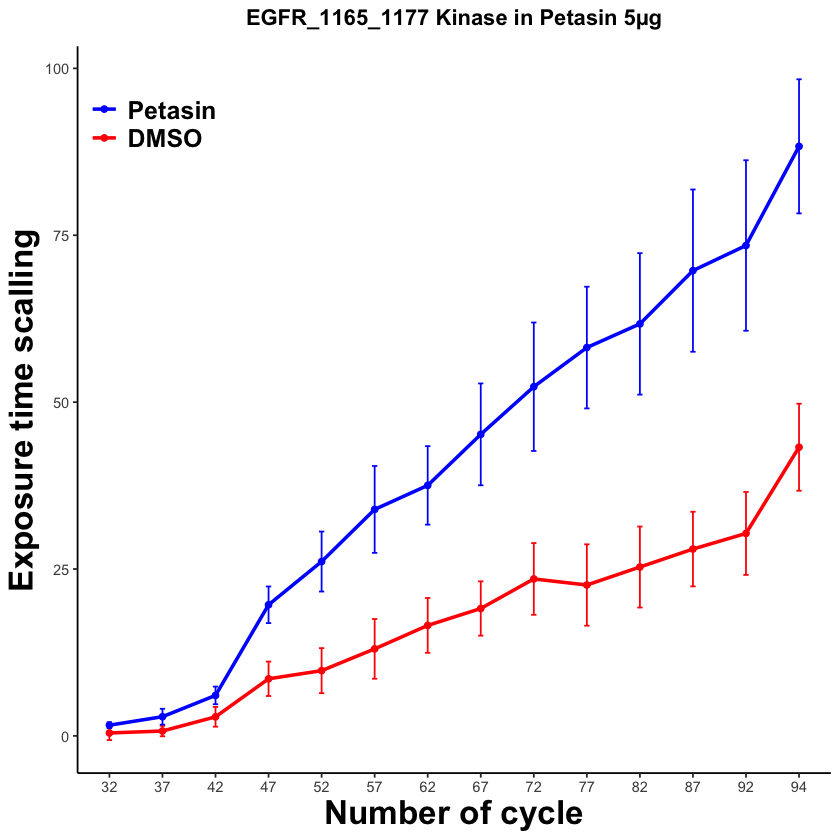

In [12]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_EFGR <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "EGFR_1165_1177") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_EFGR$treatment <- str_extract(dmso_p5_EFGR$samples, "\\w+")

dmso_p5_EFGR$time <- substr(dmso_p5_EFGR$samples, nchar(dmso_p5_EFGR$samples) - 1, nchar(dmso_p5_EFGR$samples))

##line plot

  ggplot(dmso_p5_EFGR, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "EGFR_1165_1177 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )

PDPK1_369_381

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

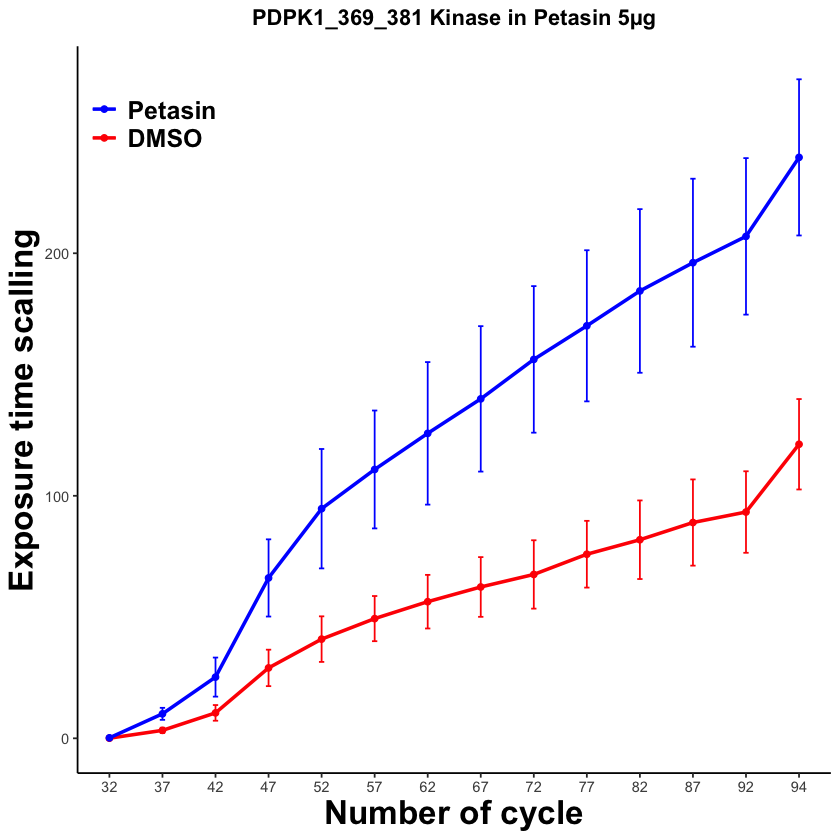

In [13]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_pdpk1 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "PDPK1_369_381") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_pdpk1$treatment <- str_extract(dmso_p5_pdpk1$samples, "\\w+")

dmso_p5_pdpk1$time <- substr(dmso_p5_pdpk1$samples, nchar(dmso_p5_pdpk1$samples) - 1, nchar(dmso_p5_pdpk1$samples))

##line plot

  ggplot(dmso_p5_pdpk1, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "PDPK1_369_381 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )

VGFR3_1061_1073

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

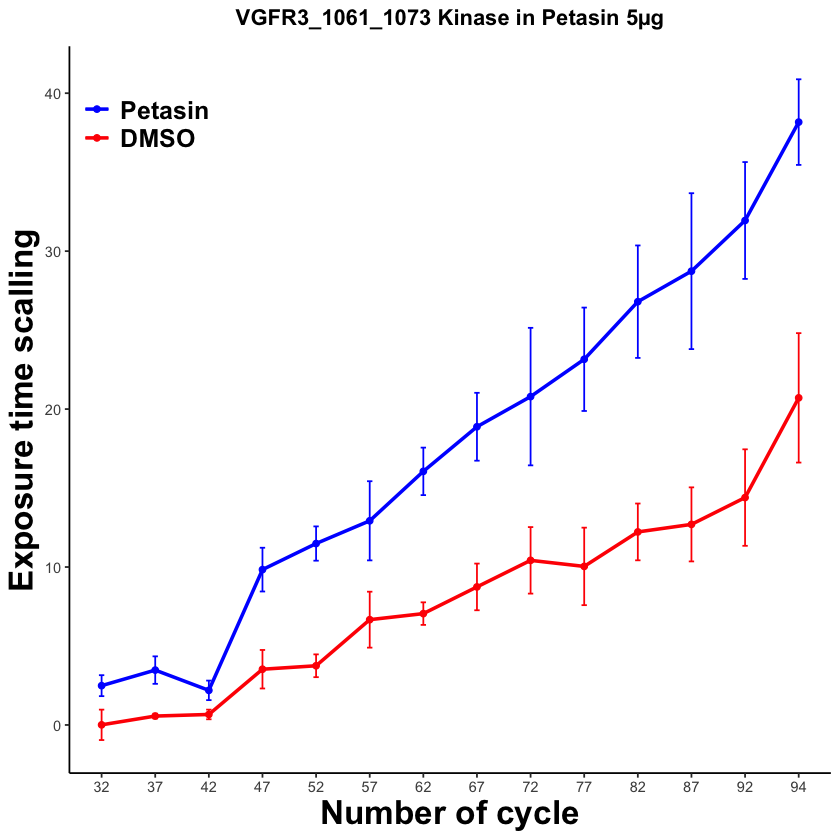

In [14]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_vgfr3 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "VGFR3_1061_1073") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_vgfr3$treatment <- str_extract(dmso_p5_vgfr3$samples, "\\w+")

dmso_p5_vgfr3$time <- substr(dmso_p5_vgfr3$samples, nchar(dmso_p5_vgfr3$samples) - 1, nchar(dmso_p5_vgfr3$samples))

##line plot

  ggplot(dmso_p5_vgfr3, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "VGFR3_1061_1073 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )

DRY1A_312_324

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

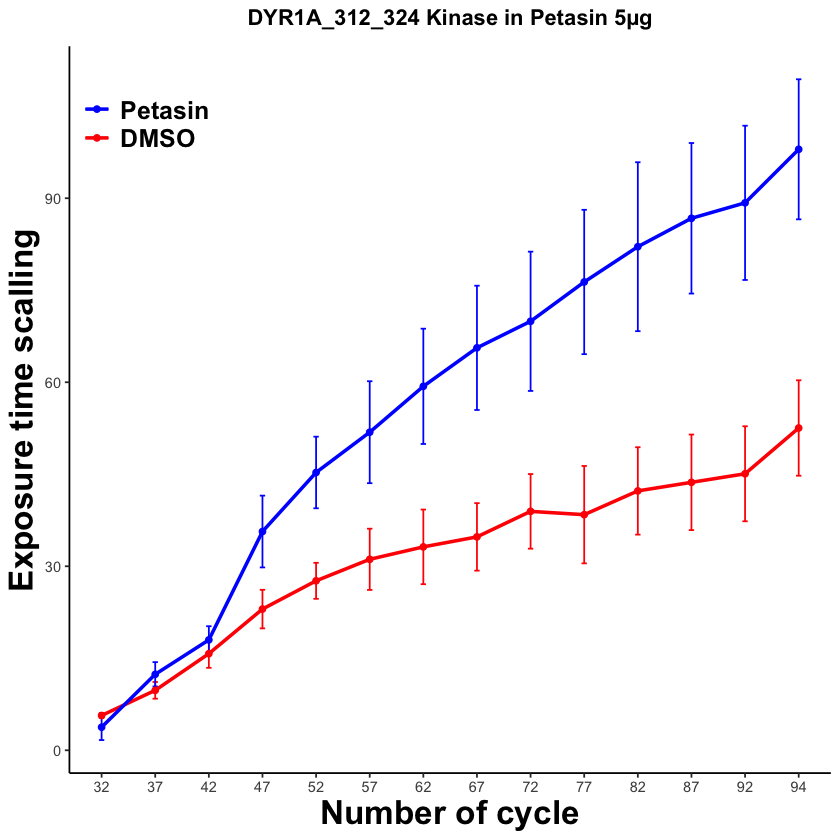

In [15]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_dry1a <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "DYR1A_312_324") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_dry1a$treatment <- str_extract(dmso_p5_dry1a$samples, "\\w+")

dmso_p5_dry1a$time <- substr(dmso_p5_dry1a$samples, nchar(dmso_p5_dry1a$samples) - 1, nchar(dmso_p5_dry1a$samples))

##line plot

  ggplot(dmso_p5_dry1a, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "DYR1A_312_324 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )


EPHB1_921_933

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

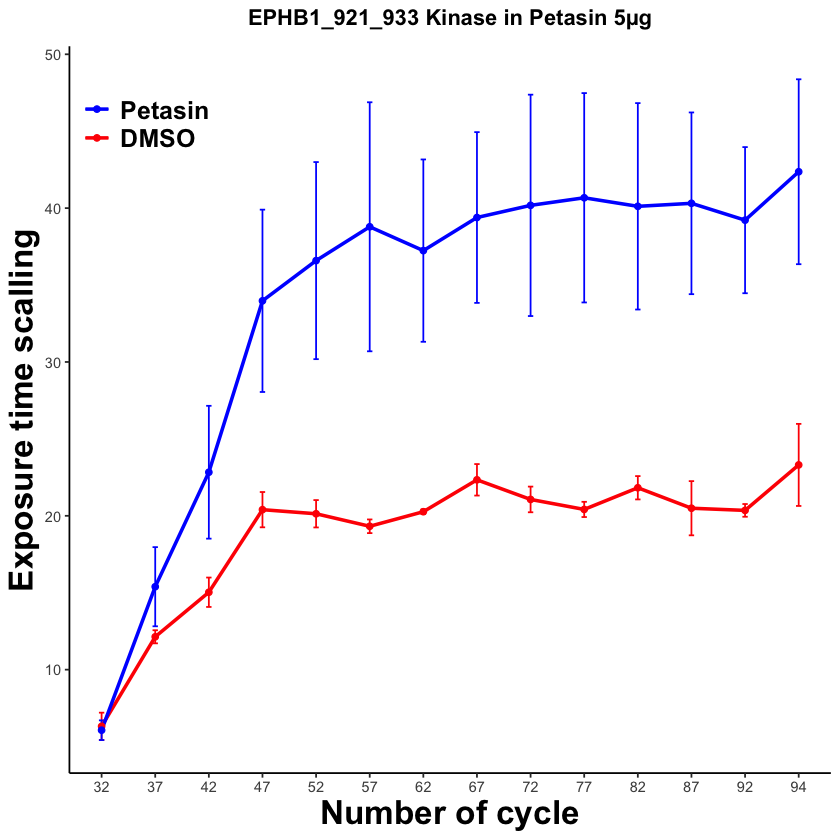

In [16]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_dry1a <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "EPHB1_921_933") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_dry1a$treatment <- str_extract(dmso_p5_dry1a$samples, "\\w+")

dmso_p5_dry1a$time <- substr(dmso_p5_dry1a$samples, nchar(dmso_p5_dry1a$samples) - 1, nchar(dmso_p5_dry1a$samples))

##line plot

  ggplot(dmso_p5_dry1a, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "EPHB1_921_933 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )


CD28_203_215

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

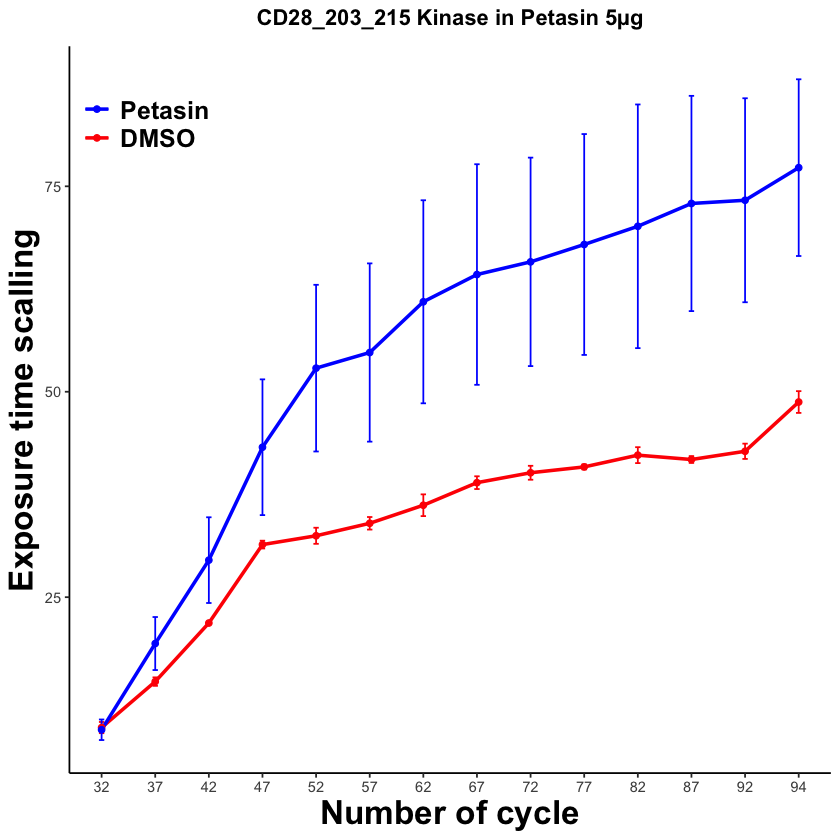

In [17]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_CD28 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "CD28_203_215") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

  dmso_p5_CD28$treatment <- str_extract(dmso_p5_CD28$samples, "\\w+")

dmso_p5_CD28$time <- substr(dmso_p5_CD28$samples, nchar(dmso_p5_CD28$samples) - 1, nchar(dmso_p5_CD28$samples))

##line plot

  ggplot(dmso_p5_CD28, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "CD28_203_215 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )


NCF1_313_325

New names:
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...5`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...6`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...7`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...8`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...9`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...10`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...11`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...12`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...13`
• `DMSO Huh7_ 77` -> `DMSO Huh7_ 77...14`
• `DMSO Huh7_ 82` -> `DMSO Huh7_ 82...15`
• `DMSO Huh7_ 87` -> `DMSO Huh7_ 87...16`
• `DMSO Huh7_ 92` -> `DMSO Huh7_ 92...17`
• `DMSO Huh7_ 94` -> `DMSO Huh7_ 94...18`
• `DMSO Huh7_ 32` -> `DMSO Huh7_ 32...19`
• `DMSO Huh7_ 37` -> `DMSO Huh7_ 37...20`
• `DMSO Huh7_ 42` -> `DMSO Huh7_ 42...21`
• `DMSO Huh7_ 47` -> `DMSO Huh7_ 47...22`
• `DMSO Huh7_ 52` -> `DMSO Huh7_ 52...23`
• `DMSO Huh7_ 57` -> `DMSO Huh7_ 57...24`
• `DMSO Huh7_ 62` -> `DMSO Huh7_ 62...25`
• `DMSO Huh7_ 67` -> `DMSO Huh7_ 67...26`
• `DMSO Huh7_ 72` -> `DMSO Huh7_ 72...27`
• `DMSO Huh7_ 77` -> `DMSO H

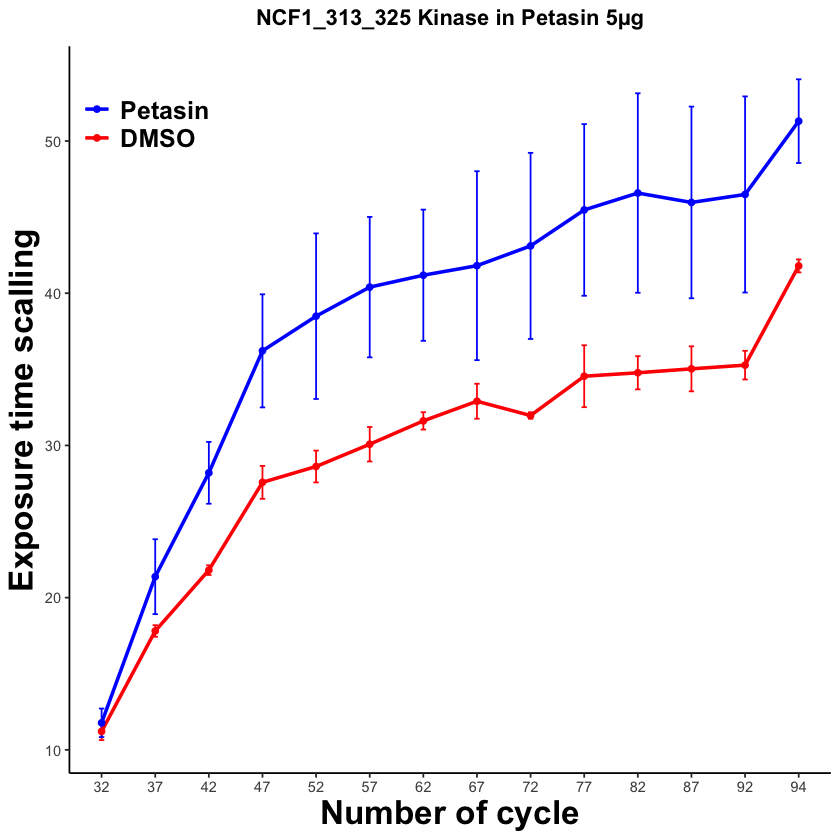

In [18]:
pamkinase<- read_excel("/Volumes/NGS/LCSC/venn_gene_list.xlsx", sheet = 14 , skip = 8)

## filter data base on desired gene
dmso_p5_NCF1 <- pamkinase %>% 
select(1:60,229:256) %>% 
  filter( ID == "NCF1_313_325") %>% 
  pivot_longer(cols = c(5:88),
             names_to = "samples",
             values_to = "ets") %>% 
  mutate(samples = gsub("\\.\\.\\..*$","",samples)) %>% 
  group_by(samples)%>% summarise(avg_ets = mean(ets), sd_ets = sd(ets), number = n(), sem = sd_ets/sqrt(number))

##1. extract first word and extract time point

 dmso_p5_NCF1$treatment <- str_extract(dmso_p5_NCF1$samples, "\\w+")

dmso_p5_NCF1$time <- substr(dmso_p5_NCF1$samples, nchar(dmso_p5_NCF1$samples) - 1, nchar(dmso_p5_NCF1$samples))

##line plot

  ggplot(dmso_p5_NCF1, aes(x=time, y=avg_ets, group= treatment, color=treatment)) + 
     geom_errorbar(aes(ymin=avg_ets-sem, ymax=avg_ets+sem), width=0.1) +
     geom_line(size = 1) + geom_point()+
  scale_color_manual(name=NULL,
      values=c("blue", "red"),
      breaks=c("Petasin", "DMSO"),
      labels=c("Petasin", "DMSO"))+
  labs(
    x = "Number of cycle",
    y = "Exposure time scalling",
    title = "NCF1_313_325 Kinase in Petasin 5µg")+
    theme_classic()+
    theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold")
    )


In [19]:
dmso_cdk4 <- read_excel("venn_gene_list.xlsx", sheet = 15, col_names = TRUE)

In [20]:
dmso_cdk4

Control,CDK4
<dbl>,<dbl>
3.521127,4.600939
4.953052,8.967135
8.262911,28.943661
6.244132,38.708920
13.309858,49.483566
13.427231,57.652580
11.924883,61.267609
13.145539,70.915489
18.028168,74.553993


In [21]:
library(ggplot2)

Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Value,Control,CDK4,0.006841456,0.0068,0.0068,**,Wilcoxon


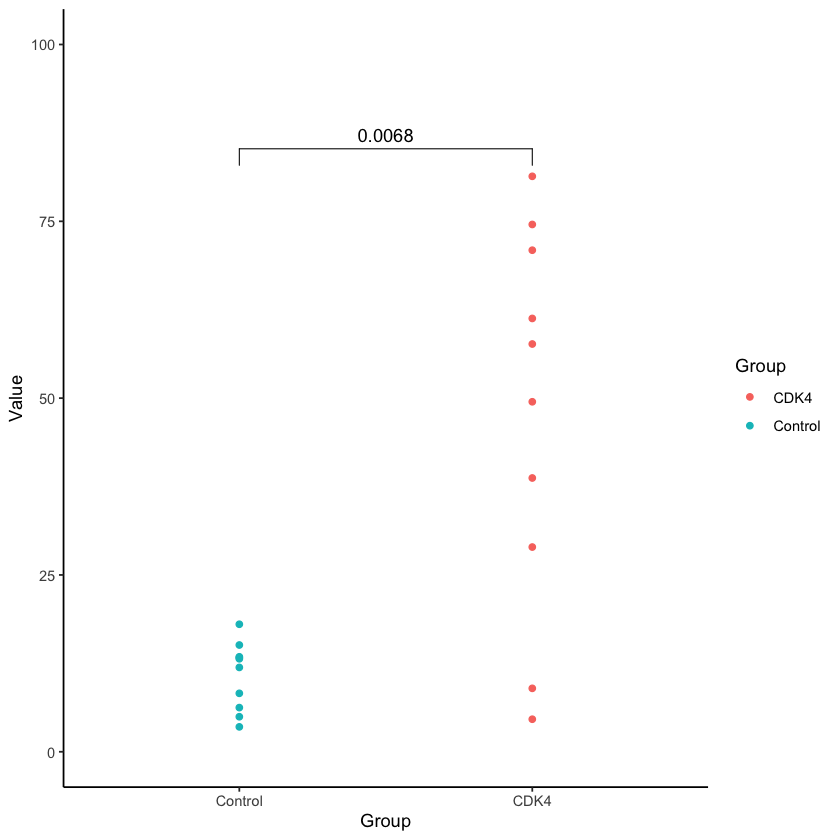

In [22]:
library(tidyverse)
library(ggpubr)


data_long <- pivot_longer(dmso_cdk4, cols = c(Control, CDK4), names_to = "Group", values_to = "Value")



ggplot(data_long, aes(x = Group, y = Value, color = Group)) +
  geom_point(stat = "identity", position = "dodge") +
  stat_compare_means(comparisons = list(c("Control", "CDK4")))+
  scale_y_continuous(limits = c(0,100))+
  scale_x_discrete(limits = c("Control","CDK4"))+
  labs(x = "Group", y = "Value") +
  theme_classic()
  compare_means(Value ~ Group, data = data_long)

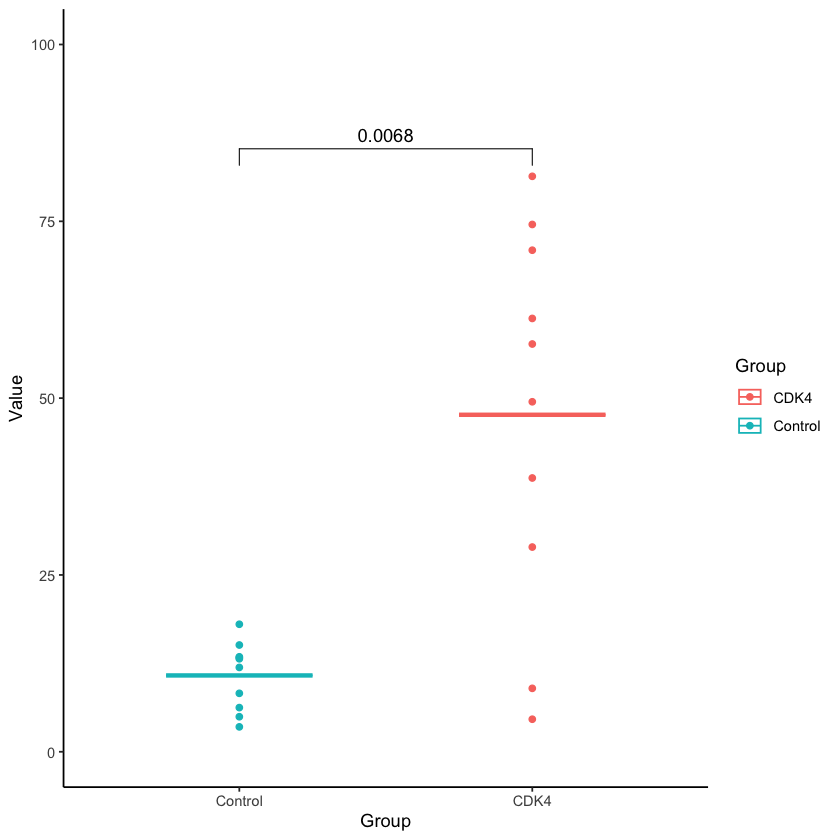

In [23]:
ggplot(data_long, aes(x = Group, y = Value, color = Group))+
  geom_point(position = position_dodge(width = 0.2))+
  scale_x_discrete(limits = c("Control","CDK4"))+
   scale_y_continuous(limits = c(0,100))+
  stat_compare_means(comparisons = list(c("Control","CDK4")))+
  stat_summary(fun = mean, 
               fun.min = mean, 
               fun.max = mean,
               geom = "crossbar", width = 0.5)+
  theme_classic()

In [24]:
compare_means(Value ~ Group, data = data_long, method = "t.test")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Value,Control,CDK4,0.00178274,0.0018,0.0018,**,T-test


In [25]:
library(ggpubr)


In [26]:
compare_means(Value ~ Group, data = data_long, method = "t.test")


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Value,Control,CDK4,0.00178274,0.0018,0.0018,**,T-test


Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


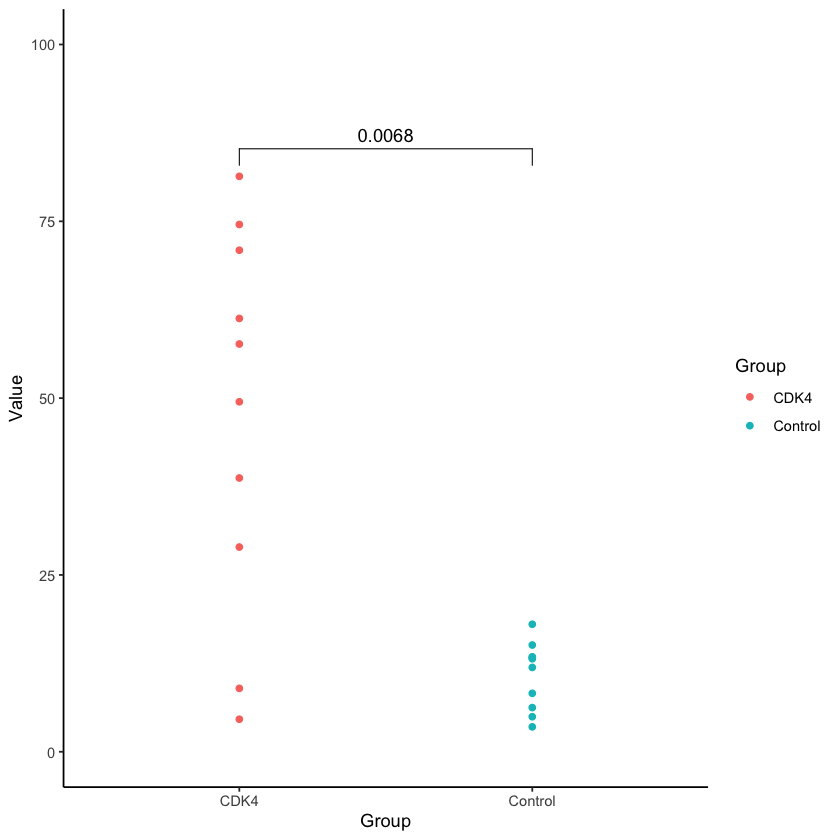

In [27]:
ggplot(data_long, aes(x = Group, y = Value, color = Group)) +
  geom_point( stat = "identity", position = "dodge") +
  stat_compare_means(comparisons = list(c("Control", "CDK4"))) +
  scale_y_continuous(limits = c(0,100))+
  labs(x = "Group", y = "Value") +
  theme_classic()

In [28]:
compare_means(len ~dose, ToothGrowth)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
len,0.5,1,7.020855e-06,1.4e-05,7.0e-06,****,Wilcoxon
len,0.5,2,8.406447e-08,2.5e-07,8.4e-08,****,Wilcoxon
len,1,2,1.772382e-04,1.8e-04,0.00018,***,Wilcoxon


Warning message in wilcox.test.default(c(4.2, 11.5, 7.3, 5.8, 6.4, 10, 11.2, 11.2, :
“kann bei Bindungen keinen exakten p-Wert Berechnen”
Warning message in wilcox.test.default(c(4.2, 11.5, 7.3, 5.8, 6.4, 10, 11.2, 11.2, :
“kann bei Bindungen keinen exakten p-Wert Berechnen”
Warning message in wilcox.test.default(c(16.5, 16.5, 15.2, 17.3, 22.5, 17.3, 13.6, :
“kann bei Bindungen keinen exakten p-Wert Berechnen”


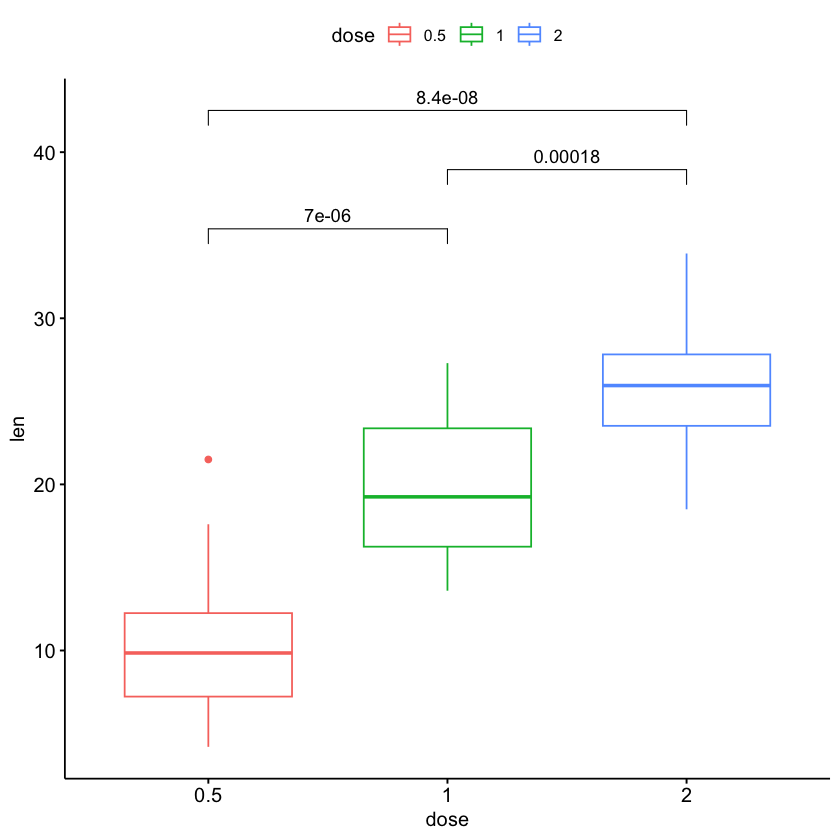

In [29]:
mycomparisons <-  list(c("0.5","1"),
                       c("1","2"),
                       c("0.5", "2"))
ggboxplot(ToothGrowth, x= "dose", y = "len", color = "dose")+
stat_compare_means(comparisons = mycomparisons);

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”
Warning message:
“The `fun.ymin` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.min` argument instead.”
Warning message:
“The `fun.ymax` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.max` argument instead.”


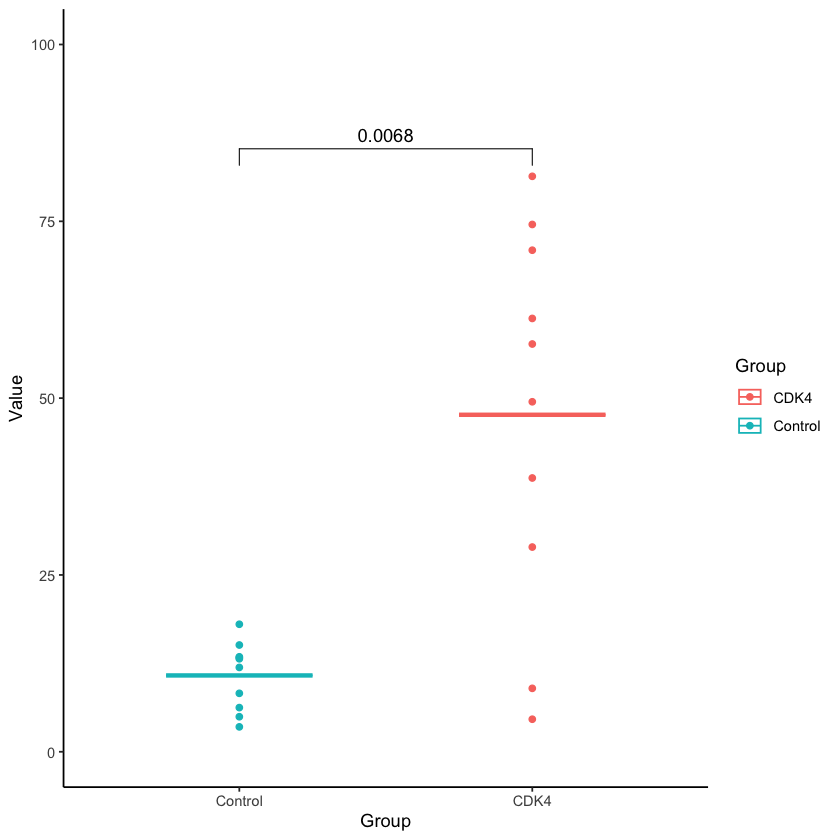

In [30]:
ggplot(data_long, aes(x = Group, y = Value, color = Group))+
  geom_point(position = position_dodge(width = 0.2))+
  stat_compare_means(comparisons = list(c("Control","CDK4")))+
  scale_x_discrete(limits = c("Control", "CDK4"))+
  scale_y_continuous(limits = c(0,100))+
  stat_summary(fun.y = mean, 
               fun.ymin = mean, 
               fun.ymax = mean,
               geom = "crossbar", width = 0.5)+
  theme_classic()

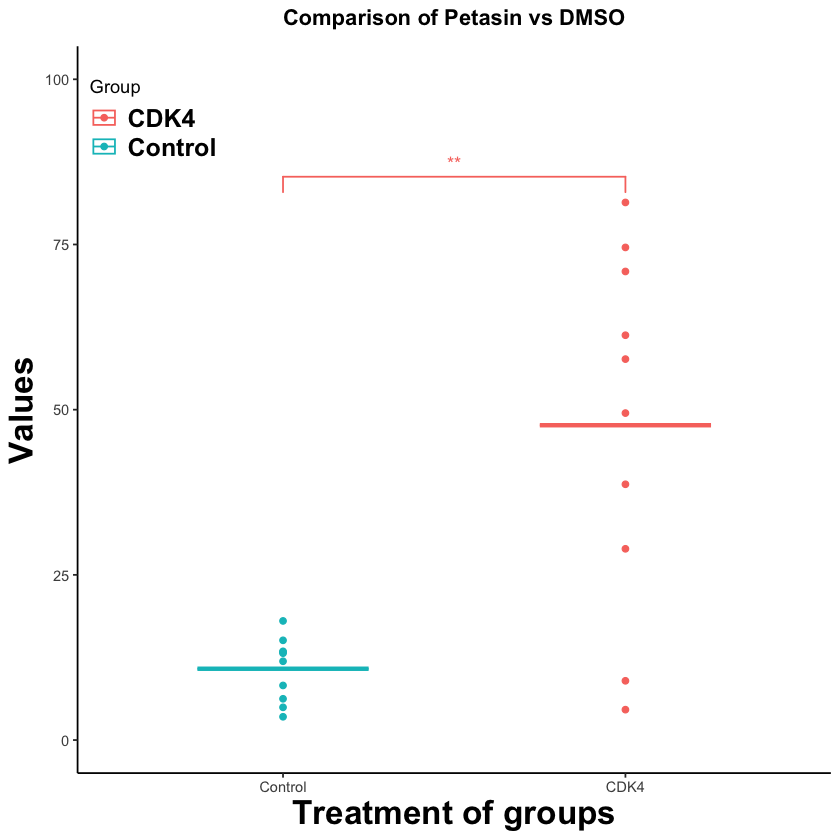

In [31]:
library(ggplot2)
library(ggsignif)
library(ggpubr)
ggplot(data_long,aes(x = Group, y = Value, color = Group))+
geom_point(position = position_dodge(width = 0.2))+
scale_x_discrete(limits = c("Control", "CDK4"))+
scale_y_continuous(limits = c(0,100))+
geom_signif(comparisons = list(c("Control", "CDK4")),map_signif_level = TRUE)+ ## to add star in plot
stat_summary(fun.y = mean, 
               fun.ymin = mean, 
               fun.ymax = mean,
               geom = "crossbar", width = 0.5)+
labs(
     title = "Comparison of Petasin vs DMSO",
     x = "Treatment of groups",
     y = "Values")+
theme_classic()+
theme(
     plot.title = element_text(margin = margin(b=10), color="black", face="bold", hjust = 0.5),
     axis.title.x = element_text(face= "bold", size = 20, colour = "black"),
     axis.title.y = element_text(face = "bold", size = 20, colour = "black"),
     legend.position = c(0.1,0.9),
     legend.text = element_text(size = 15, face = "bold"))

### Graphs by Automation

In [32]:
zdhhc17 <- read.csv("/Volumes/NGS/LCSC/.ipynb_checkpoints/epcm_code/Control_ZDHHC3.csv", header = TRUE, sep = ",")
head(zdhhc17)

,sample,CBL,CD3Z,CD3Z.1,CD79A,CDK1,CDK2,EFS,EGFR,EPHA2,⋯,FES,FRK,GAB2,IRS2,JAK2,MPZL1,PECA1,PLCG1,PRGR,RET
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Scramble Cont,5.573576,4.055078,4.4457569,10.97497,7.846437,8.251147,11.105657,4.710872,7.606632,⋯,8.089463,9.092308,4.654704,6.833129,5.670823,6.519711,7.948918,9.306578,4.449499,7.814265
2,Scramble Cont,5.808813,3.274894,4.2233644,10.63955,7.516592,8.009327,10.464624,4.356888,7.425632,⋯,7.997020,9.048718,4.747813,6.702532,5.774911,6.357884,7.697295,8.872399,4.679348,7.761802
3,Scramble Cont,5.928951,4.160823,4.8285856,10.86025,7.791716,8.373563,10.615842,4.291670,7.940632,⋯,8.185062,9.125828,4.524745,7.311684,5.509887,6.536815,7.767185,9.128602,4.316473,7.943068
4,ASO_ZDHHC17,4.384519,0.000000,0.9014361,10.14396,7.182722,7.490794,9.848859,3.958580,6.731255,⋯,7.236420,8.469911,4.015231,5.992752,4.815111,5.825709,7.298084,8.658885,3.982886,6.954854
5,ASO_ZDHHC17,5.165381,0.000000,1.5104842,10.36242,7.191688,7.627568,10.076236,3.573576,6.995954,⋯,7.551255,8.750280,3.491248,6.421509,4.936527,5.582124,7.381584,8.498793,3.826668,7.371756
6,ASO_ZDHHC17,5.183472,0.000000,3.1175694,10.36176,7.171247,7.698213,10.141047,3.694144,7.215144,⋯,7.658751,8.805714,4.214594,6.447317,4.818974,5.960330,7.479551,8.666542,3.817044,7.562675


In [33]:
df_long <- zdhhc17 %>% 
  pivot_longer(
    cols = 2:22,  # Columns to pivot
    names_to = "gene",  # Name for new column that will contain score variable names
    values_to = "log2_SI"  # Name for new column that will contain score values
  )
  df_long

sample,gene,log2_SI
<chr>,<chr>,<dbl>
Scramble Cont,CBL,5.573576
Scramble Cont,CD3Z,4.055078
Scramble Cont,CD3Z.1,4.445757
Scramble Cont,CD79A,10.974966
Scramble Cont,CDK1,7.846437
Scramble Cont,CDK2,8.251147
Scramble Cont,EFS,11.105657
Scramble Cont,EGFR,4.710872
Scramble Cont,EPHA2,7.606632


In [35]:
df_long %>% group_by(sample, gene)   -> pvl 
summarize(pvl, mean_fc = mean(log2_SI), sd_fc = sd(log2_SI)) -> df1
df1 

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


sample,gene,mean_fc,sd_fc
<chr>,<chr>,<dbl>,<dbl>
ASO_ZDHHC17,CBL,4.911124,0.45614284
ASO_ZDHHC17,CD3Z,0.000000,0.00000000
ASO_ZDHHC17,CD3Z.1,1.843163,1.14490972
ASO_ZDHHC17,CD79A,10.289379,0.12593626
ASO_ZDHHC17,CDK1,7.181886,0.01024569
ASO_ZDHHC17,CDK2,7.605525,0.10545176
ASO_ZDHHC17,EFS,10.022047,0.15344616
ASO_ZDHHC17,EGFR,3.742100,0.19693118
ASO_ZDHHC17,EPHA2,6.980784,0.24230071


## Here is loop for the data list of gene in sample vs control

In [36]:
for (gene in unique(df1$gene)) {
  df_gene <- subset(df1, gene == gene)
  p <- ggplot(df_gene, aes(x = sample, y = mean_fc)) +
    geom_point(size = 3, position = position_dodge (1)) +
    geom_errorbar(aes(ymin = mean_fc - sd_fc, ymax = mean_fc + sd_fc), width = 0.2) +
    ggtitle(paste("Gene:", gene)) +
    xlab("Sample Type") +
    ylab("Fold Change") +
    theme_bw()
  ggsave(filename = paste0("/Volumes/NGS/LCSC/zdhhc",gene, "_dotplot.png"), plot = p, dpi = 300)
}

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
